**PROCESAMIENTO DE LAS IMAGENES DE ENTRENAMIENTO**

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
import json
import random

**PATHS**

In [2]:
image_path      = '../../../dataset/images'
training_path   = os.path.join(image_path, 'training')
original_path   = os.path.join(training_path, 'original')
processed_path  = os.path.join(training_path, 'processed')

**LISTAS DE IMAGENES**

In [3]:
original  = [os.path.join(original_path, image) for image in os.listdir(original_path)]
processed  = [os.path.join(processed_path, image) for image in os.listdir(processed_path)]

**RANGOS DE COLOR**

In [6]:
lower_green = np.array([28, 40, 40])
upper_green = np.array([100, 255, 255])

lower_red_1 = np.array([0, 120, 100])
upper_red_1 = np.array([5, 255, 255])

lower_red_2 = np.array([170, 120, 100])
upper_red_2 = np.array([179, 255, 255])

lower_yellow = np.array([18, 50, 80])
upper_yellow = np.array([33, 255, 255])

lower_orange = np.array([5, 120, 90])
upper_orange = np.array([20, 255, 255])

**PRUEBA CON LOS VALORES HSV**
- Utilizando directamente los valores medios de HSV a largo de la imagen en donde la mascara es verdara no funciona

In [27]:
features  = []
for image_file, mask_file in zip(original, processed):
    image = cv2.imread(image_file)
    mask  = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

    # Convertir la imagen de BGR a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Aplicar la máscara
    fruit     = cv2.bitwise_and(hsv_image, hsv_image, mask = mask)

    # Calcular el valor promedio en la región de la fruta
    hsv_mean  = cv2.mean(fruit, mask = mask)
    hsv_mean  = np.array(hsv_mean[:3])
    features.append(hsv_mean)

In [28]:
hsv_matrix = np.array(features)

In [29]:
# Aplicar K-Means para agrupar los vectores en 4 clusters (frutas)
kmeans = KMeans(n_clusters = 4)
kmeans.fit(hsv_matrix)

# Obtener las etiquetas de cluster para cada región de fruta
labels = kmeans.labels_

/home/estudiante/Documentos/fruit_recognition/speech_recognition-main/myvenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
clusters = dict.fromkeys(set(labels))
for file, label in zip(original, labels):
    if clusters[label] is None:
        clusters[label] = []
    clusters[label].append(file)

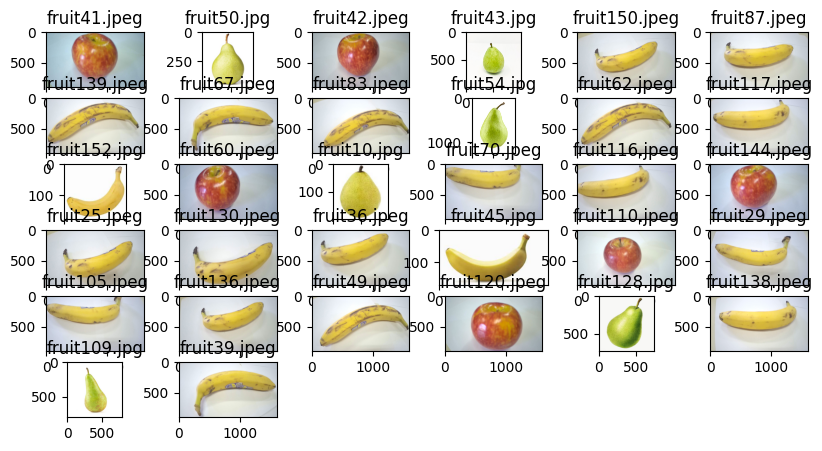

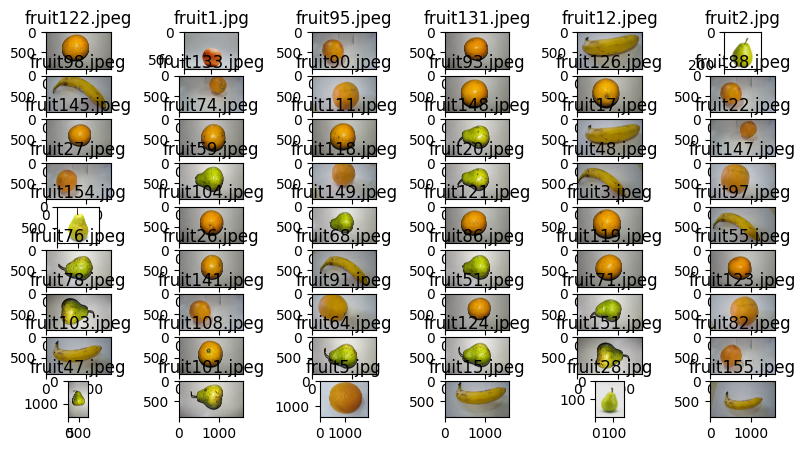

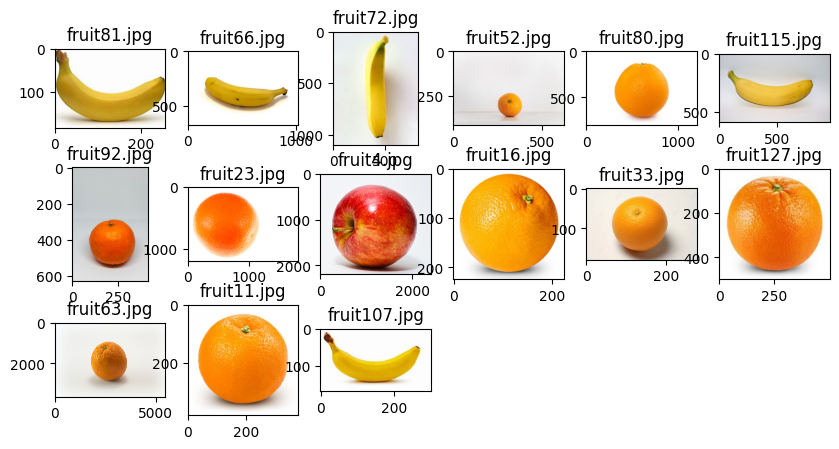

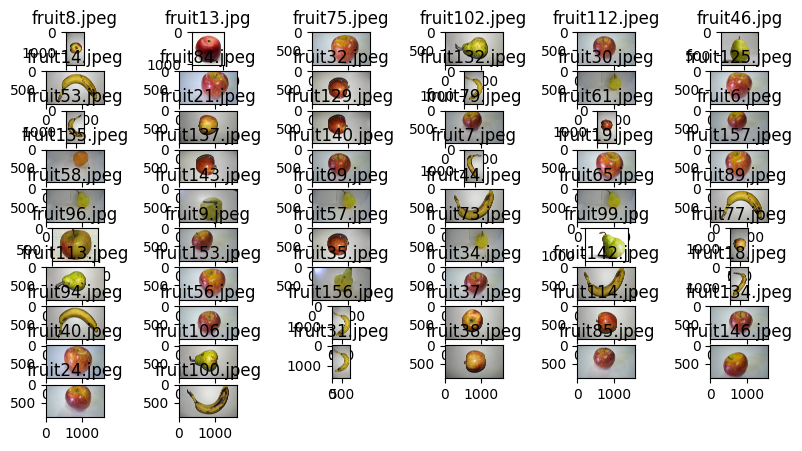

In [31]:
for key, cluster in clusters.items():
    cols = 6
    rows = len(cluster)//cols

    if len(cluster)%cols != 0:
        rows += 1

    plt.figure(figsize = (10, 5))
    for i, element in enumerate(cluster):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.cvtColor(cv2.imread(element), cv2.COLOR_BGR2RGB))
        plt.title(os.path.basename(element))
    plt.show()